### Project Title: Credit Card Segmentation

### Problem Statement:
Here  we require to  develop  a  customer  segmentation  of credit card users to  define marketing strategy. 

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import os

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Load the Data

In [2]:
#Let's read the dataset first
############working directory#################
os.chdir("G:/Data Science Project")
credit_df = pd.read_csv("credit-card-data.csv")
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credit_df.shape

(8950, 18)

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
CUST_ID=credit_df['CUST_ID']

In [7]:
CUST_ID=pd.DataFrame(CUST_ID,columns=['CUST_ID'])

In [8]:
# Write your code for dropping the custid columns here.
credit = credit_df.drop('CUST_ID', axis=1)

In [9]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Missing value analysis

In [10]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#####Deriving new KPI
#####1a monthly avereage purchases and cash advance amount

In [11]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [12]:
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
dtype: int64

In [13]:
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [14]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#####Limit usage (balance to credit limit ratio)
#####payment to minimum payment ratio

In [15]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
credit['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

####I found 4 types of purchases happend in credit card data i am categorisinf it

In [16]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [17]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 21)

In [18]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 21)

In [19]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 21)

In [20]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 21)

**I found out that there are 4 types of purchase behaviour in the data set.**
               
               1.People who only do One-Off Purchases.
               2.People who only do Installments Purchases.
               3.People who do both.
               4.People who do none.
               
**So deriving a categorical variable based on the behaviour.**

In [21]:
def purchase(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [22]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [23]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [24]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,one_off


In [25]:
#Extreme value analysis
# log tranformation
cr_log=credit.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [26]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [27]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [28]:
cr_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360


In [29]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [30]:
cre_original.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,0.040901,1.446508,istallment,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,0.457495,3.826241,none,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,0.332687,0.991682,one_off,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,0.222223,0.000000,one_off,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,0.681429,2.771075,one_off,0,0,0,1


In [31]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type']).head()


<ipython-input-31-9de08e8183d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_pre['purchase_type']=credit.loc[:,'purchase_type']


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [32]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [33]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,istallment,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off,0,0,0,1


In [34]:
l=['purchase_type']

In [35]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_oneoff_installment             0
istallment                          0
none                                0
one_off                             0
dtype: int64

In [36]:
cr_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


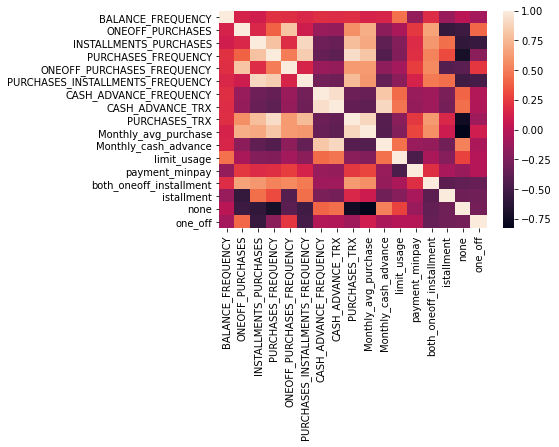

In [37]:
sns.heatmap(cr_dummy.corr())

As we can see there are more number of variable which are correlated to each other
so i consider PCA analysis for variable reduction

In [38]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
credit_scaled = standard_scaler.fit_transform(cr_dummy)

In [39]:
credit_scaled


array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

### PCA

In [40]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [41]:
#Performing the PCA
pca.fit(credit_scaled)

PCA(random_state=42, svd_solver='randomized')

In [42]:
#List of PCA components.
pca.components_

array([[ 2.97070974e-02,  2.14107206e-01,  3.12050629e-01,
         3.45823234e-01,  2.14701949e-01,  2.95450810e-01,
        -2.14335829e-01, -2.29393485e-01,  3.55503414e-01,
         3.45992143e-01, -2.43861174e-01, -1.46301905e-01,
         1.19631616e-01,  2.41392147e-01,  8.22090779e-02,
        -3.10282785e-01, -4.21375183e-02],
       [ 2.40072217e-01,  4.06078184e-01, -9.84036594e-02,
         1.58134096e-02,  3.62207806e-01, -1.12002477e-01,
         2.86073833e-01,  2.91555606e-01,  1.06624771e-01,
         1.41635391e-01,  2.64317622e-01,  2.35709775e-01,
         2.13280163e-02,  2.73675977e-01, -4.43375470e-01,
        -5.21353912e-03,  1.67737275e-01],
       [-2.63139562e-01,  2.39165449e-01, -3.15625277e-01,
        -1.62843340e-01,  1.63222341e-01, -3.30029351e-01,
        -2.78585530e-01, -2.85089324e-01, -1.02742788e-01,
         2.39861305e-02, -2.57427211e-01, -2.51278131e-01,
         1.36356889e-01, -1.31934764e-01, -2.08683305e-01,
        -9.69113841e-02,  4.7

In [43]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([4.02057869e-01, 1.80586110e-01, 1.47293952e-01, 8.16063453e-02,
       6.55113033e-02, 4.15936648e-02, 2.24432813e-02, 2.05188798e-02,
       1.23673028e-02, 9.61095026e-03, 6.13515227e-03, 3.03019018e-03,
       2.63575533e-03, 2.57093358e-03, 1.67435750e-03, 3.63952683e-04,
       2.17282191e-37])

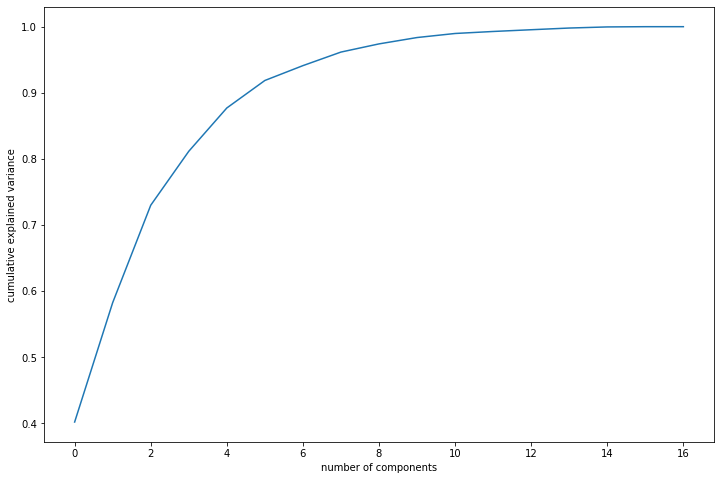

In [44]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**As we can see the 88% of variance was explained by 5 PC components

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40205787, 0.58264398, 0.72993793, 0.81154428, 0.87705558,
       0.91864924, 0.94109253, 0.96161141, 0.97397871, 0.98358966,
       0.98972481, 0.992755  , 0.99539076, 0.99796169, 0.99963605,
       1.        , 1.        ])

In [46]:
columns=cr_dummy.columns

In [47]:
#Understanding how the original 17 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(cr_dummy.columns)
colnames

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'Monthly_avg_purchase',
 'Monthly_cash_advance',
 'limit_usage',
 'payment_minpay',
 'both_oneoff_installment',
 'istallment',
 'none',
 'one_off']

In [48]:
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
1,ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
2,INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
3,PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
4,ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
5,PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
6,CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
7,CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
8,PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
9,Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


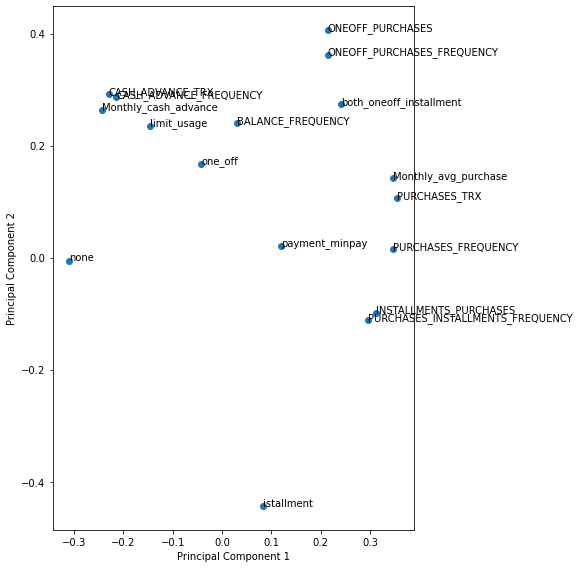

In [49]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [50]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [51]:
pca_final

IncrementalPCA(n_components=5)

In [52]:
df_pca = pca_final.fit_transform(credit_scaled)
df_pca.shape

(8950, 5)

In [53]:
df_pca

array([[-0.24303638,  2.75941537,  0.34527329, -0.40876937, -0.00676501],
       [-3.97564766, -0.14366797, -0.53569917,  1.03559114, -0.4216259 ],
       [ 1.2878343 , -1.51616931,  2.7233616 , -1.88289112,  0.01518656],
       ...,
       [ 1.15613613,  2.79633295, -0.5320671 , -0.67602438,  0.32659158],
       [-3.25022841,  1.01130582,  0.47819191,  0.82718661, -1.1205855 ],
       [ 0.2392264 , -2.23265271,  1.83156605, -1.12936238,  1.7399784 ]])

In [54]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [55]:
pc

array([[-0.24303638, -3.97564766,  1.2878343 , ...,  1.15613613,
        -3.25022841,  0.2392264 ],
       [ 2.75941537, -0.14366797, -1.51616931, ...,  2.79633295,
         1.01130582, -2.23265271],
       [ 0.34527329, -0.53569917,  2.7233616 , ..., -0.5320671 ,
         0.47819191,  1.83156605],
       [-0.40876937,  1.03559114, -1.88289112, ..., -0.67602438,
         0.82718661, -1.12936238],
       [-0.00676501, -0.4216259 ,  0.01518656, ...,  0.32659158,
        -1.1205855 ,  1.7399784 ]])

In [56]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [57]:
pcs_df2.shape

(8950, 5)

In [58]:
pcs_df2['purchase_type']=credit['purchase_type']

In [59]:
pcs_df2.shape

(8950, 6)

In [60]:
pcs_df2.shape

(8950, 6)

In [61]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,purchase_type
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,istallment
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,none
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,one_off
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,one_off
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,one_off


In [62]:
purchasetype=pcs_df2

### CLUSTERING

In [63]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [64]:
pcs_df2=pcs_df2.drop('purchase_type',axis=1)

In [65]:
pcs_df2

,PC1,PC2,PC3,PC4,PC5
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626
2,1.287834,-1.516169,2.723362,-1.882891,0.015187
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840
...,...,...,...,...,...
8945,1.778963,2.621609,-0.718695,-0.049057,0.629893
8946,1.613706,2.655958,-0.924065,-0.929086,0.311879
8947,1.156136,2.796333,-0.532067,-0.676024,0.326592
8948,-3.250228,1.011306,0.478192,0.827187,-1.120585


In [66]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.9353440512422257

In [67]:
dat3_1 = pcs_df2

### K-MEANS CLUSTERING

In [68]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

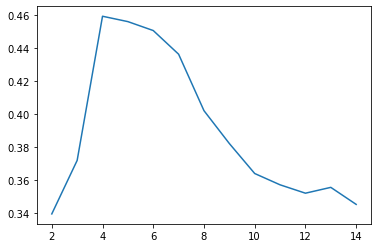

In [69]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

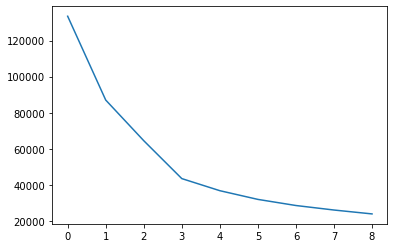

In [70]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [71]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [72]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,2
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,1
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,3
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,3
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,3
...,...,...,...,...,...,...
8945,1.778963,2.621609,-0.718695,-0.049057,0.629893,2
8946,1.613706,2.655958,-0.924065,-0.929086,0.311879,2
8947,1.156136,2.796333,-0.532067,-0.676024,0.326592,2
8948,-3.250228,1.011306,0.478192,0.827187,-1.120585,1


In [73]:
dat_km['ClusterID'].value_counts()


0    2757
2    2229
1    2090
3    1874
Name: ClusterID, dtype: int64

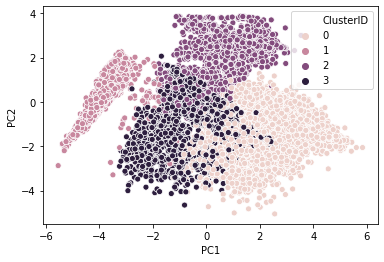

In [74]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [75]:
#Let's perform K means using K=5
model_clus3 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus3.fit(dat3_1)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [76]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km1 = pd.concat([dat4, pd.Series(model_clus3.labels_)], axis=1)
dat_km1.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km1.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,1
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,0
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,4
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,4
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,4


In [77]:
dat_km1['ClusterID'].value_counts()

1    2129
0    2084
3    1983
4    1860
2     894
Name: ClusterID, dtype: int64

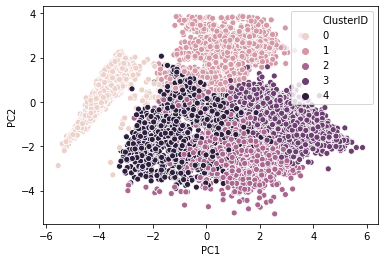

In [78]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km1)

In [79]:
bigdata=pd.merge(dat_km, purchasetype, on= ['PC1','PC2','PC3','PC4','PC5'],how='inner')

In [80]:
bigdata['CUST_ID']=credit_df['CUST_ID']
bigdata.head()


,PC1,PC2,PC3,PC4,PC5,ClusterID,purchase_type,CUST_ID
0,-0.243036,2.759415,0.345273,-0.408769,-0.006765,2,istallment,C10001
1,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,1,none,C10002
2,1.287834,-1.516169,2.723362,-1.882891,0.015187,3,one_off,C10003
3,-1.048064,-0.675997,2.484095,-1.325593,0.751237,3,one_off,C10004
4,-1.451844,0.183275,2.294527,-1.608468,-0.561840,3,one_off,C10005


In [81]:
cre_original['CUST_ID']=credit_df['CUST_ID']
cre_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,1.446508,istallment,0,1,0,0,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,3.826241,none,0,0,1,0,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,0.991682,one_off,0,0,0,1,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,0.000000,one_off,0,0,0,1,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2.771075,one_off,0,0,0,1,C10005


# With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

In [82]:
####preparing profile for clustering with k=4
maindata=pd.merge(cre_original, bigdata, on='CUST_ID', how='inner')

In [83]:
maindata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,none,one_off,CUST_ID,PC1,PC2,PC3,PC4,PC5,ClusterID,purchase_type_y
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0,0,C10001,-0.243036,2.759415,0.345273,-0.408769,-0.006765,2,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1,0,C10002,-3.975648,-0.143668,-0.535699,1.035591,-0.421626,1,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,1,C10003,1.287834,-1.516169,2.723362,-1.882891,0.015187,3,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,1,C10004,-1.048064,-0.675997,2.484095,-1.325593,0.751237,3,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,1,C10005,-1.451844,0.183275,2.294527,-1.608468,-0.561840,3,one_off


In [84]:
maindata1=maindata.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
maindata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

*Analysis of the Clusters

In [85]:
clu_balance = pd.DataFrame(maindata1.groupby(["ClusterID"]).BALANCE.mean())
clu_purchases= pd.DataFrame(maindata1.groupby(["ClusterID"]).PURCHASES.mean())
clu_purchasefreq = pd.DataFrame(maindata1.groupby(["ClusterID"]).PURCHASES_FREQUENCY.mean())
clu_purchasetrx = pd.DataFrame(maindata1.groupby(["ClusterID"]).PURCHASES_TRX.mean())
clu_Monthlyavgpurchase = pd.DataFrame(maindata1.groupby(["ClusterID"]).Monthly_avg_purchase.mean())
clu_Monthlycashadvance = pd.DataFrame(maindata1.groupby(["ClusterID"]).Monthly_cash_advance.mean())
clu_limitusage = pd.DataFrame(maindata1.groupby(["ClusterID"]).limit_usage.mean())
clu_cashadvtrx = pd.DataFrame(maindata1.groupby(["ClusterID"]).CASH_ADVANCE_TRX.mean())
clu_payminpaymentratio = pd.DataFrame(maindata1.groupby(["ClusterID"]).payment_minpay.mean())
clu_both = pd.DataFrame(maindata1.groupby(["ClusterID"]).both_oneoff_installment.mean())
clu_installment = pd.DataFrame(maindata1.groupby(["ClusterID"]).istallment.mean())
clu_one_off = pd.DataFrame(maindata1.groupby(["ClusterID"]).one_off.mean())
clu_none = pd.DataFrame(maindata1.groupby(["ClusterID"]).none.mean())
clu_creditlimit = pd.DataFrame(maindata1.groupby(["ClusterID"]).CREDIT_LIMIT.mean())


In [86]:
df = pd.concat([pd.Series([0,1,2,3]),clu_balance,clu_purchases,clu_purchasefreq,clu_purchasetrx,clu_Monthlyavgpurchase,clu_Monthlycashadvance,clu_limitusage,clu_cashadvtrx,clu_payminpaymentratio,clu_both,clu_installment,clu_one_off,clu_none,clu_creditlimit], axis=1)

In [87]:
df.columns = ["ClusterID",'clu_balance','clu_purchases','clu_purchasefreq','clu_purchasetrx','clu_Monthlyavgpurchase','clu_Monthlycashadvance','clu_limitusage','clu_cashadvtrx','clu_payminpaymentratio','clu_both','clu_installment','clu_one_off','clu_none','clu_creditlimit']
df

,ClusterID,clu_balance,clu_purchases,clu_purchasefreq,clu_purchasetrx,clu_Monthlyavgpurchase,clu_Monthlycashadvance,clu_limitusage,clu_cashadvtrx,clu_payminpaymentratio,clu_both,clu_installment,clu_one_off,clu_none,clu_creditlimit
0,0,1811.244331,2280.612488,0.802265,33.135292,193.759754,67.644533,0.354616,2.808125,7.264788,1.000000,0.000000,0.000000,0.000000,5748.836753
1,1,2177.572394,1.859344,0.003758,0.045933,0.159337,186.298043,0.576217,6.552632,9.927979,0.002392,0.017225,0.003349,0.977033,4055.582137
2,2,798.267082,543.583589,0.703035,12.051144,47.560400,33.474821,0.264156,1.018843,13.404629,0.002243,0.997757,0.000000,0.000000,3338.238396
3,3,1429.021056,787.353671,0.321170,7.118997,69.758276,77.843485,0.378727,2.864995,5.561421,0.003735,0.000000,0.996265,0.000000,4512.905630


### HIERARCHIAL CLUSTERING

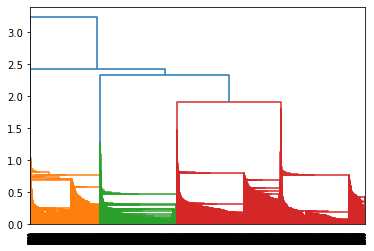

In [88]:
# heirarchical clustering
mergings = linkage(pcs_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

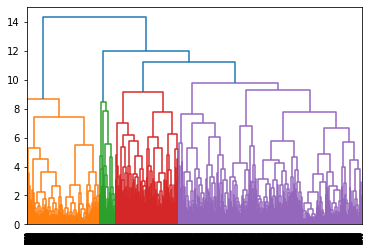

In [89]:
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [90]:
dat_hc=cre_original

In [91]:
dat_hc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,1.446508,istallment,0,1,0,0,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,3.826241,none,0,0,1,0,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,0.991682,one_off,0,0,0,1,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,0.000000,one_off,0,0,0,1,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2.771075,one_off,0,0,0,1,C10005


In [92]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))


In [93]:
clusterCut.to_frame() 
dat_hc_clus = pd.concat([dat_hc, clusterCut], axis=1)

In [94]:
dat_hc_clus.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment,istallment,none,one_off,CUST_ID,0
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,0.040901,1.446508,istallment,0,1,0,0,C10001,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,536.912124,0.457495,3.826241,none,0,0,1,0,C10002,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.332687,0.991682,one_off,0,0,0,1,C10003,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,17.149001,0.222223,0.000000,one_off,0,0,0,1,C10004,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,0.681429,2.771075,one_off,0,0,0,1,C10005,2


In [95]:
dat_hc_clus.columns
dat_hc_clus.columns = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','payment_minpay', 'purchase_type','both_oneoff_installment','istallment','none','one_off','CUST_ID','CLUST_ID']

In [96]:
clu_balance = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).BALANCE.mean())
clu_purchases= pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).PURCHASES.mean())
clu_Monthlyavgpurchase = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).Monthly_avg_purchase.mean())
clu_Monthlycashadvance = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).Monthly_cash_advance.mean())
clu_limitusage = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).limit_usage.mean())
clu_cashadvtrx = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).CASH_ADVANCE_TRX.mean())
clu_payminpaymentratio = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).payment_minpay.mean())
clu_both = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).both_oneoff_installment.mean())
clu_installment = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).istallment.mean())
clu_one_off = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).one_off.mean())
clu_none = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).none.mean())
clu_creditlimit = pd.DataFrame(dat_hc_clus.groupby(["CLUST_ID"]).CREDIT_LIMIT.mean())



In [97]:
df_hc = pd.concat([pd.Series([0,1,2,3]),clu_balance,clu_purchases,clu_purchasefreq,clu_purchasetrx,clu_Monthlyavgpurchase,clu_Monthlycashadvance,clu_limitusage,clu_cashadvtrx,clu_payminpaymentratio,clu_both,clu_installment,clu_one_off,clu_none,clu_creditlimit], axis=1)

In [98]:
df_hc.columns = ["ClusterID",'clu_balance','clu_purchases','clu_purchasefreq','clu_purchasetrx','clu_Monthlyavgpurchase','clu_Monthlycashadvance','clu_limitusage','clu_cashadvtrx','clu_payminpaymentratio','clu_both','clu_installment','clu_one_off','clu_none','clu_creditlimit']
df_hc

,ClusterID,clu_balance,clu_purchases,clu_purchasefreq,clu_purchasetrx,clu_Monthlyavgpurchase,clu_Monthlycashadvance,clu_limitusage,clu_cashadvtrx,clu_payminpaymentratio,clu_both,clu_installment,clu_one_off,clu_none,clu_creditlimit
0,0,59.064949,165.084151,0.802265,33.135292,14.274404,32.974903,0.018611,0.629717,88.761041,0.000000,0.790094,0.000000,0.209906,3611.045597
1,1,2239.064325,0.000000,0.003758,0.045933,0.000000,184.376215,0.598228,6.459805,2.860054,0.000000,0.000000,0.000000,1.000000,4035.261990
2,2,927.672621,1408.947090,0.703035,12.051144,120.319659,7.250916,0.269127,0.228490,6.455587,0.396689,0.325567,0.277744,0.000000,4425.122335
3,3,3014.887742,1199.231827,0.321170,7.118997,105.054381,230.241734,0.587763,8.973810,3.733313,0.495833,0.197619,0.306548,0.000000,5452.234848


In [99]:
df_hc.to_csv('hierarchical.csv',index=True)

In [100]:
df.to_csv('kmeans.csv',index=True)

In [101]:
df


,ClusterID,clu_balance,clu_purchases,clu_purchasefreq,clu_purchasetrx,clu_Monthlyavgpurchase,clu_Monthlycashadvance,clu_limitusage,clu_cashadvtrx,clu_payminpaymentratio,clu_both,clu_installment,clu_one_off,clu_none,clu_creditlimit
0,0,1811.244331,2280.612488,0.802265,33.135292,193.759754,67.644533,0.354616,2.808125,7.264788,1.000000,0.000000,0.000000,0.000000,5748.836753
1,1,2177.572394,1.859344,0.003758,0.045933,0.159337,186.298043,0.576217,6.552632,9.927979,0.002392,0.017225,0.003349,0.977033,4055.582137
2,2,798.267082,543.583589,0.703035,12.051144,47.560400,33.474821,0.264156,1.018843,13.404629,0.002243,0.997757,0.000000,0.000000,3338.238396
3,3,1429.021056,787.353671,0.321170,7.118997,69.758276,77.843485,0.378727,2.864995,5.561421,0.003735,0.000000,0.996265,0.000000,4512.905630


<big>
*** Insights with 4 Clusters ***



---

<big>


- Cluster 3 customers are doing maximum One_Off transactions and has least payment ratio amongst all the cluster.



- Cluster 0 is the group of customers who have highest Monthly cash advance and doing both installment as well as one_off   purchases, have comparatively good credit score but have poor average purchase score.



- Cluster 1 customers have maximum Average Purchase and good Monthly cash advance but this cluster doesn't do installment or one_off purchases.



- cluster 2 is doing maximum installment, has maximum payment too min_payment ratio and doesn't do one-off purchases

---





# Marketing Strategy Suggested:

## a. Group 1
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 0
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 3
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 2
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       

BOTH THE HIERARCHICAL AND K-MEANS ARE CLUSTERED SAMELY SO I CONSIDER CLUSTERING WITH K=4 IS ADEQUATE ENOUGH FOR CUSTOMER PROFILING.